In [14]:
# Project: AQI (Air Quality Index) Analysis of Different Cities of India

# Step 1: Import necessary libraries
import pandas as pd   # For data handling
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns   # For better-looking graphs


In [15]:
# Step 2: Load the dataset
data = pd.read_csv('city_day.csv')  # Load the data file
print("Data Loaded Successfully!")


Data Loaded Successfully!


In [16]:
# Step 3: Explore the dataset
print(data.head())  # See first 5 rows
print(data.info())  # See data types and missing values

        City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----- 

In [17]:
# Step 4: Handle missing values
print("Missing values before handling:\n", data.isnull().sum())
data['AQI'] = data['AQI'].ffill()  # Fill missing AQI values using forward fill
print("Missing values after handling:\n", data.isnull().sum())

Missing values before handling:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64
Missing values after handling:
 City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI              28
AQI_Bucket     4681
dtype: int64


In [18]:
# Step 5: Convert 'Date' column to DateTime type
data['Date'] = pd.to_datetime(data['Date'])

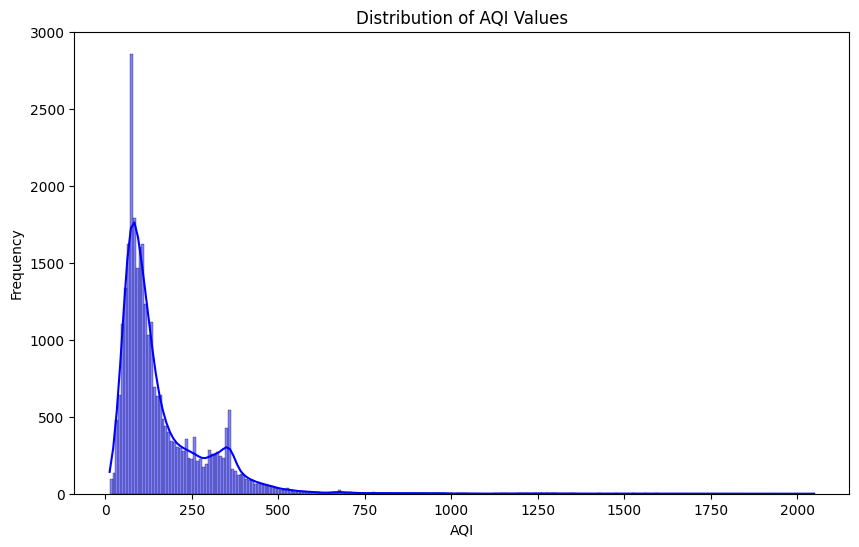

In [19]:
# Step 6: Plot 1 - AQI Distribution
plt.figure(figsize=(10,6))
sns.histplot(data['AQI'], kde=True, color='blue')
plt.title('Distribution of AQI Values')
plt.xlabel('AQI')
plt.ylabel('Frequency')
plt.show()

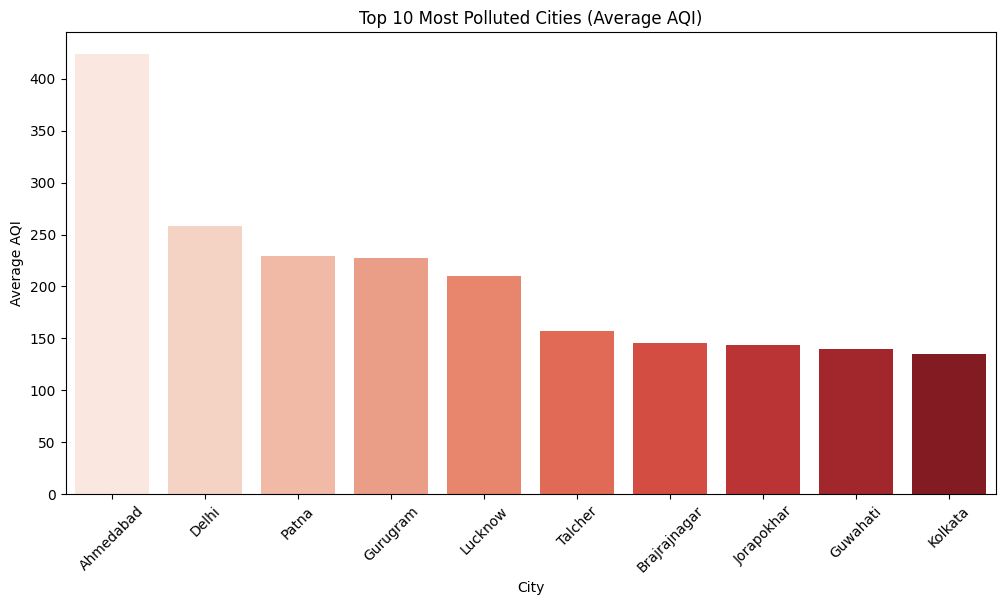

In [21]:
# Step 7: Plot 2 - Top 10 Most Polluted Cities (Average AQI)
top_cities = data.groupby('City')['AQI'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='Reds', hue=top_cities.index, legend=False)
plt.xticks(rotation=45)
plt.title('Top 10 Most Polluted Cities (Average AQI)')
plt.xlabel('City')
plt.ylabel('Average AQI')
plt.show()

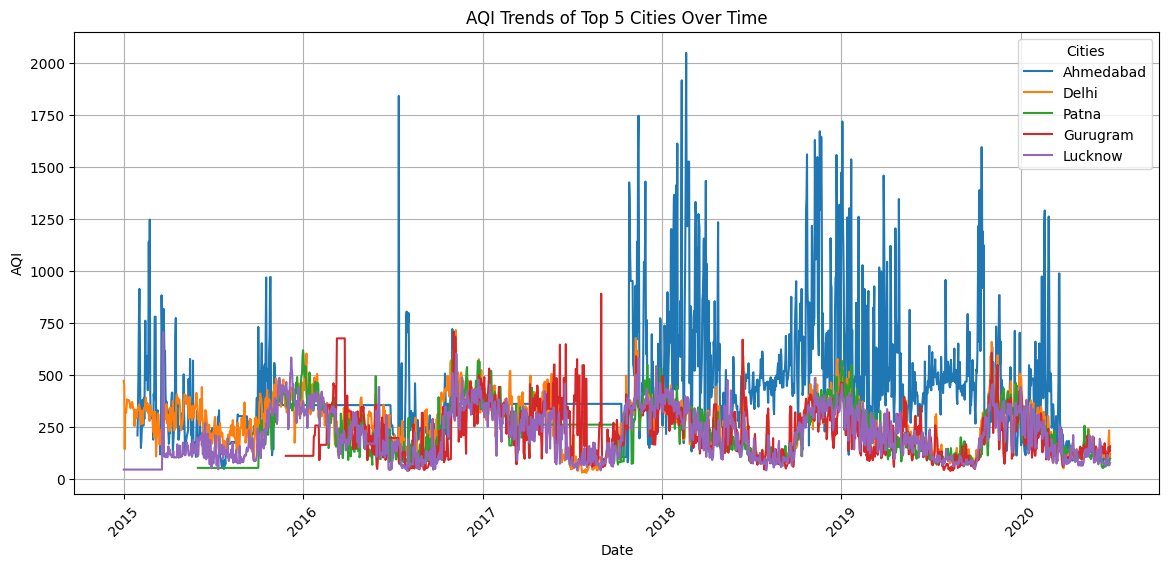

In [26]:
# Step 8: Plot AQI of Multiple Cities Over Time

# Get the top 5 cities with highest average AQI
top_cities = data.groupby('City')['AQI'].mean().sort_values(ascending=False).head(5).index

# Filter data for those top cities
top_cities_data = data[data['City'].isin(top_cities)]

plt.figure(figsize=(14,6))

# Plot AQI over time for each of the top 5 cities
for city in top_cities:
    city_data = top_cities_data[top_cities_data['City'] == city]
    plt.plot(city_data['Date'], city_data['AQI'], label=city)

plt.title('AQI Trends of Top 5 Cities Over Time')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.legend(title="Cities")
plt.grid(True)
plt.show()


In [23]:
# Step 9: Create AQI Categories
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif aqi <= 100:
        return 'Satisfactory'
    elif aqi <= 200:
        return 'Moderate'
    elif aqi <= 300:
        return 'Poor'
    elif aqi <= 400:
        return 'Very Poor'
    else:
        return 'Severe'

data['AQI_Category'] = data['AQI'].apply(classify_aqi)

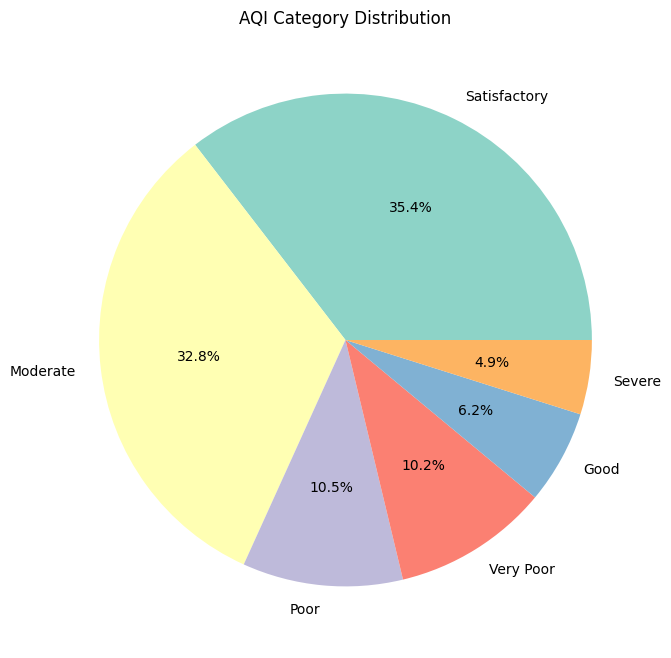

In [24]:
# Step 10: Plot 4 - Pie Chart of AQI Categories
plt.figure(figsize=(8,8))
data['AQI_Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('AQI Category Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()

In [25]:
# Step 11: Save the cleaned dataset
data.to_csv('Cleaned_AQI_Data.csv', index=False)
print("Cleaned Data Saved Successfully!")

Cleaned Data Saved Successfully!


# Conclusion

This project analyzes AQI data from various cities in India, providing insights into pollution levels and trends over time. 
It visualizes the air quality distribution, identifies the most polluted cities, and tracks AQI changes for better environmental awareness.